# Section 3: Coding Demo

## In this section, we aim to demonstrate: How to calculate following five centrality calculation methods with only numpy package? And we will compare our results with the results generated by networkx. All the graph examples we used in this manuscript are shown in the lecture sildes. 
### 3.1 PageRank Centrality
### 3.2 Hits Centrality
### 3.3 Edge Betweenness Centrality
### 3.4 Node Betweenness Centrality


### 3.1 PageRank Centrality

Problem with Katz and Eigenvector Centralities:

- In directed graphs, once a node becomes an authority (high centrality), it passes all its centrality to each of its neighbors

- This is less desirable since not everyone known by a well-known person is well-known, e.g., a fan of a well-known actor

__Solution:__
- We can divide the value of passed centrality by the number of outgoing links, i.e., out-degree of that node

- Each connected neighbor gets a fraction of the source node’s centrality


$$ \boldsymbol{C}_{pr} = \alpha A ^{T} D^{-1} \boldsymbol{C}_{pr} + \beta * \boldsymbol{1} $$

In [13]:
import numpy as np
import networkx as nx
# If you are using https://jupyter.org/try-jupyter/lab/ uncomment following two lines
# import micropip
# await micropip.install("scipy") 

# This function is defined to plot the graph.
def plot_graph(graph, diGraph = False):
    if diGraph:
        g = nx.DiGraph()
    else:
        g = nx.Graph()
    # Create a directed graph object.
    for key, value in graph.items():
        for neighbor in value:
            # Add an edge between the node and its neighbor.
            g.add_edge(key,neighbor)
    # Draw the graph.
    nx.draw(g, with_labels=True)


 # This function outputs an Graph object from networkx package.    
def graph_networkx(graph,diGraph = False):
    if diGraph:
        g = nx.DiGraph()
    else:
        g = nx.Graph()
    # Create a directed graph object.
    for key, value in graph.items():
        for neighbor in value:
            # Add an edge between the node and its neighbor.
            g.add_edge(key,neighbor)
    return g

The example is from Page 9 of Week 4 Lecture slides. Please compare the results from the slide and from the code.

___________________________________
adjacency matrix of the graph: 
 [[0. 0. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]]
Interation 1: the value of the pagerank centrality: [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
Interation 2: the value of the pagerank centrality: [0.07142857 0.04761905 0.19047619 0.16666667 0.19047619 0.11904762
 0.21428571]
Interation 3: the value of the pagerank centrality: [0.02380952 0.06349206 0.23809524 0.1468254  0.19047619 0.08730159
 0.25      ]
Interation 4: the value of the pagerank centrality: [0.03174603 0.07936508 0.25793651 0.13095238 0.1547619  0.11111111
 0.23412698]
Interation 5: the value of the pagerank centrality: [0.03968254 0.08597884 0.24470899 0.1521164  0.14153439 0.12566138
 0.21031746]
Interation 6: the value of the pagerank centrality: [0.04298942 0.08156966 0.22354497 0.15762787 0.165

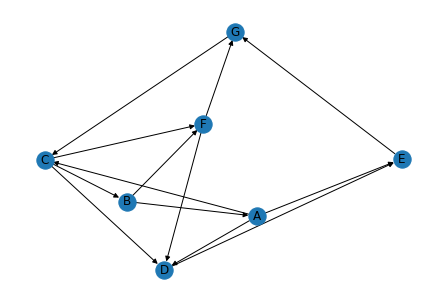

In [14]:
graph = {'A': ['C','D','E'],
         'B': ['A','F'],
         'C': ['B', 'F','D'],
         'D': ['E'],
         'E': ['G'],
         'F': ['D','G'],
         'G': ['C']
        }

def pagerank_centrality(graph, alpha, beta):
    # Construct adjacency matrix
    n = len(graph)
    nodes = sorted(list(graph.keys()))
    # Initialize the adjacency matrix with zeros
    A = np.zeros((n, n))

    # Populate the adjacency matrix
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if nodes[j] in graph[nodes[i]]:
                A[i][j] = 1
    print('adjacency matrix of the graph: \n', A)

    # Construct degree matrix
    D = np.diag(A.sum(axis=1))

    # Power iteration to calculate PageRank vector
    eps = 1e-6
    count = 0
    prev_PR = np.zeros(n)
    PR = np.ones(n) / n
    while np.sum(np.abs(prev_PR-PR)) > eps:
        if count < 9:
            count = count+ 1
            print('Interation {}: the value of the pagerank centrality: {}'.format(count,PR))
        prev_PR = PR
        PR = alpha * A.T @ np.linalg.inv(D) @ PR + beta  * np.ones(n)
        PR = PR / np.sum(np.abs(PR))
        
    PR = dict(zip([i for i in range(len(PR))], PR))
    return PR


plot_graph(graph, diGraph=True)
print("___________________________________")
print("results from the code: ", pagerank_centrality(graph,1,0))
print("---------------------------------------------------------------------------------------------------")
print("results from the networkx: ", nx.pagerank(graph_networkx(graph, diGraph=True),alpha=1))

### 3.2 Hits Centrality

Spectral measures
- HITS Centrality: In a directed graph, a node is more important if it has more links
- In-coming links? Out-going links?

Each node has 2 scores:
- Quality as an expert (hub): Total sum of votes (authority scores) of nodes that it points to (out-going links)
- Quality as a content provider (authority): Total sum of votes (hub scores) from nodes that point to it (in-coming links)




The example is from Page 21 of Week 4 Lecture slides. Please compare the results from the slide and from the code.

Node	Authority Score	Hub Score
A	0.0	0.06824002279697558
B	0.0	0.1487834118324772
C	0.0	0.1487834118324772
D	0.04719938048694132	0.0
E	0.05261145332774475	0.08882874713151666
F	0.38874442879917626	0.09901417090912175
G	0.45883328405839297	0.0
H	0.0	0.06824002279697558
I	0.05261145332774475	0.1487834118324772
J	0.0	0.1487834118324772
K	0.0	0.08054338903550161
results from the networkx: 
a:  {'A': 0.0, 'F': 0.38874464095800626, 'B': 0.0, 'G': 0.45883325692260785, 'C': 0.0, 'E': 0.05261137971059382, 'D': 0.0471993426981982, 'I': 0.05261137971059382, 'H': 0.0, 'J': 0.0, 'K': 0.0}
h:  {'A': 0.06824004928250058, 'F': 0.09901412469258844, 'B': 0.14878342085847382, 'G': 0.0, 'C': 0.14878342085847382, 'E': 0.088828721732542, 'D': 0.0, 'I': 0.14878342085847382, 'H': 0.06824004928250058, 'J': 0.14878342085847382, 'K': 0.08054337157597326}


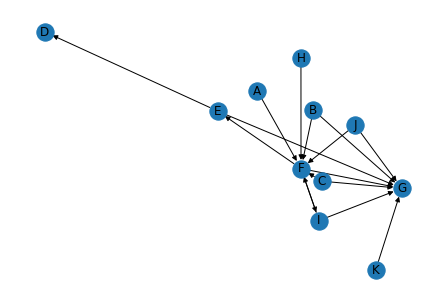

In [18]:
graph = {'A': ['F'],
         'B': ['F', 'G'],
         'C': ['F', 'G'],
         'D': [],
         'E': ['D', 'G'],
         'F': ['E', 'G', 'I'],
         'G': [],
         'H': ['F'],
         'I': ['F', 'G'],
         'J': ['F', 'G'],
         'K': ['G']
         }


def hits_centrality(adj_list):
    nodes = list(adj_list.keys())
    n = len(nodes)
    adj_matrix = np.zeros((n, n))

    # Loop through the adjacency list and fill in the adjacency matrix
    for i, node in enumerate(nodes):
        for neighbor in adj_list[node]:
            j = nodes.index(neighbor)
            adj_matrix[i, j] = 1

    # Set up the HITS algorithm
    n_nodes = len(nodes)
    prev_hub_scores = np.zeros(n_nodes)
    prev_authority_scores = np.zeros(n_nodes)
    hub_scores = np.ones(n_nodes)
    authority_scores = np.ones(n_nodes)

    # Run the HITS algorithm
    eps = 1e-6
    for i in range(10):
        authority_scores = np.dot(adj_matrix.T, hub_scores)
        hub_scores = np.dot(adj_matrix, authority_scores)

    # Normalize the scores
    authority_scores_norm = authority_scores / np.sum(authority_scores)
    hub_scores_norm = hub_scores / np.sum(hub_scores)

    # Print the results
    print("Node\tAuthority Score\tHub Score")
    for i, node in enumerate(nodes):
        print("{}\t{}\t{}".format(node, authority_scores_norm[i], hub_scores_norm[i]))


hits_centrality(graph)
plot_graph(graph, diGraph=True)

h, a = nx.hits(graph_networkx(graph,True),normalized=True)
print("results from the networkx: ")
print("a: ", a)
print("h: ", h)

#### 3.3 Edge Betweenness Centrality

results from the code:  {('A', 'B'): 14.771428571428569, ('A', 'C'): 14.771428571428569, ('A', 'D'): 21.504761904761907, ('A', 'E'): 16.03809523809524, ('B', 'C'): 2.0, ('B', 'F'): 12.371428571428572, ('C', 'F'): 12.371428571428572, ('D', 'H'): 12.99047619047619, ('D', 'G'): 17.752380952380953, ('E', 'H'): 14.704761904761904, ('F', 'I'): 23.79047619047619, ('G', 'I'): 17.038095238095238, ('G', 'J'): 12.219047619047618, ('H', 'J'): 17.504761904761903, ('I', 'K'): 14.752380952380953, ('J', 'K'): 13.419047619047621}
---------------------------------------------------------------------------------------------------
results from the networkx:  {('A', 'B'): 7.385714285714284, ('A', 'C'): 7.385714285714284, ('A', 'D'): 10.752380952380953, ('A', 'E'): 8.019047619047619, ('B', 'C'): 1.0, ('B', 'F'): 6.185714285714286, ('C', 'F'): 6.185714285714286, ('D', 'H'): 6.495238095238095, ('D', 'G'): 8.876190476190477, ('E', 'H'): 7.352380952380952, ('F', 'I'): 11.895238095238096, ('H', 'J'): 8.752380952

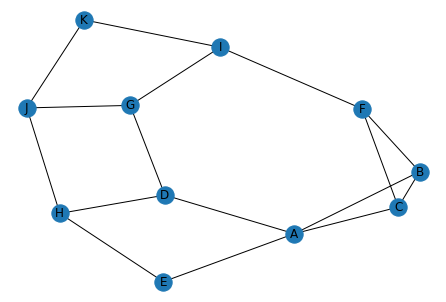

In [16]:
import numpy as np

graph = {'A': ['B','C','D','E'],
         'B': ['A', 'C', 'F'],
         'C': ['F','B', 'A'],
         'D': ['A','H','G'],
         'E': ['A', 'H'],
         'F': ['B', 'C', 'I'],
         'G': ['D','I','J'],
         'H': ['D','E','J'],
         'I': ['F', 'G','K'],
         'J': ['H', 'G', 'K'],
         'K': ['I','J']
         }

def edge_betweenness_centrality(adj_list):
    
    edge_list = [(key,value) for key in graph for value in graph[key] if key < value]
    betweenness = {edge: 0 for edge in edge_list}

    for s in adj_list.keys():
        # single source shortest paths
        S = []
        P = {}
        for v in adj_list.keys():
            P[v] = []
        sigma = {v: 0 for v in adj_list}
        D = {}
        sigma[s] = 1.0
        D[s] = 0
        Q = [s]
        while Q:  # use BFS to find shortest paths
            v = Q.pop(0)
            S.append(v)
            Dv = D[v]
            sigmav = sigma[v]
            for w in adj_list[v]:
                if w not in D:
                    Q.append(w)
                    D[w] = Dv + 1
                if D[w] == Dv + 1:  
                    sigma[w] += sigmav
                    P[w].append(v)  
    
        # accumulation
        delta = {v: 0 for v in S}
        while S:
            w = S.pop()
            coeff = (1 + delta[w]) / sigma[w]
            for v in P[w]:
                c = sigma[v] * coeff
                if (v, w) not in betweenness:
                    betweenness[(w, v)] += c
                else:
                    betweenness[(v, w)] += c
                delta[v] += c
    return betweenness


plot_graph(graph)
print("results from the code: ", edge_betweenness_centrality(graph))
print("---------------------------------------------------------------------------------------------------")
print("results from the networkx: ", nx.edge_betweenness_centrality(graph_networkx(graph),normalized=False))

#### 3.4 Node Betweenness Centrality

results from the code:  {'A': 23.54285714285714, 'B': 4.571428571428572, 'C': 4.571428571428572, 'D': 16.123809523809527, 'E': 5.371428571428572, 'F': 14.266666666666667, 'G': 13.504761904761905, 'H': 12.6, 'I': 17.79047619047619, 'J': 11.571428571428571, 'K': 4.085714285714285}
results from the networkx:  {'A': 11.771428571428569, 'B': 2.285714285714286, 'C': 2.285714285714286, 'D': 8.061904761904762, 'E': 2.685714285714286, 'F': 7.133333333333334, 'H': 6.3, 'G': 6.752380952380952, 'I': 8.895238095238096, 'J': 5.785714285714286, 'K': 2.0428571428571427}


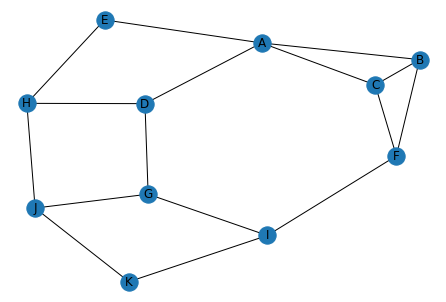

In [17]:
graph = {'A': ['B','C','D','E'],
         'B': ['A', 'C', 'F'],
         'C': ['F','B', 'A'],
         'D': ['A','H','G'],
         'E': ['A', 'H'],
         'F': ['B', 'C', 'I'],
         'G': ['D','I','J'],
         'H': ['D','E','J'],
         'I': ['F', 'G','K'],
         'J': ['H', 'G', 'K'],
         'K': ['I','J']
         }

def betweenness_centrality(adj_list):
    
    # edge_list = [(key,value) for key in graph for value in graph[key] if key < value]
    betweenness = {edge: 0 for edge in adj_list.keys()}

    for s in adj_list.keys():
        # single source shortest paths
        S = []
        P = {}
        for v in adj_list.keys():
            P[v] = []
        sigma = {v: 0 for v in adj_list}
        D = {}
        sigma[s] = 1.0
        D[s] = 0
        Q = [s]
        while Q:  # use BFS to find shortest paths
            v = Q.pop(0)
            S.append(v)
            Dv = D[v]
            sigmav = sigma[v]
            for w in adj_list[v]:
                if w not in D:
                    Q.append(w)
                    D[w] = Dv + 1
                if D[w] == Dv + 1:  
                    sigma[w] += sigmav
                    P[w].append(v)  
    
        # accumulation
        delta = {v: 0 for v in S}
        while S:
            w = S.pop()
            coeff = (1 + delta[w]) / sigma[w]
            for v in P[w]:
                c = sigma[v] * coeff
                delta[v] += c
            if w != s:
                betweenness[w] += delta[w]
    return betweenness

plot_graph(graph)
print("results from the code: ", betweenness_centrality(graph))
print("results from the networkx: ", nx.betweenness_centrality(graph_networkx(graph), normalized= False))